# C1000-112 SampleTest 実装解法

+ IBM Certified Associate Developer - Quantum Computation using Qiskit v0.2X
  + Exam C1000-112: Fundamentals of Quantum Computation Using Qiskit v0.2X Developer
  + <https://www.ibm.com/training/certification/C0010300>
+ サンプルテストの解を実装で確認します。（Google Colaboratory で作成しています）

## ライブラリ準備

In [ ]:
# The latest version of 0.2X
!pip install Qiskit==0.29.1

In [ ]:
!pip install pylatexenc

## 1.Which statement will create a quantum circuit with four quantum bits and four classical bits?

In [4]:
from qiskit import QuantumCircuit

#A
qc = QuantumCircuit(4, 4) 

qc.qregs, qc.cregs

([QuantumRegister(4, 'q')], [ClassicalRegister(4, 'c')])

## 2.Given this code fragment, what is the probability that a measurement would result in |0> ?

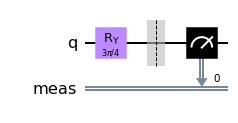

In [5]:
from qiskit import QuantumCircuit, Aer, execute
import math

qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)

qc.measure_all()
qc.draw('mpl')

In [12]:
backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shots=1000, random_seed=1).result()
counts = result.get_counts()
print(counts)

{'1': 855, '0': 145}


In [13]:
counts['0']/(counts['0']+counts['1'])
# C (0.1464)

0.145

## 3.Assuming the fragment below, which three code fragments would produce the circuit illustrated?

In [15]:
from qiskit import QuantumRegister, QuantumCircuit

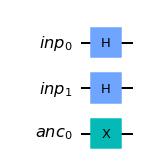

In [16]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#A：正解
qc.h(inp_reg)
qc.x(ancilla)
qc.draw('mpl')

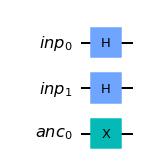

In [17]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#B：正解
qc.h(inp_reg[0:2])
qc.x(ancilla[0])
qc.draw('mpl')

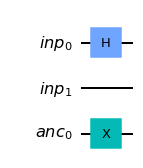

In [18]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#C
qc.h(inp_reg[0:1])
qc.x(ancilla[0])
qc.draw('mpl')

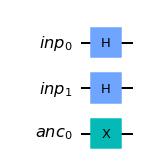

In [19]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#D：正解
qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(ancilla[0])
qc.draw('mpl')

In [ ]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#E
qc.h(inp_reg[1])
qc.h(inp_reg[2]) # IndexError: list index out of range
qc.x(ancilla[1])
qc.draw('mpl')

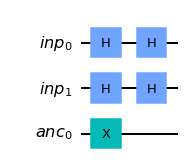

In [21]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

#F
qc.h(inp_reg)
qc.h(inp_reg)
qc.x(ancilla)
qc.draw('mpl')

## 4.Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments would create this circuit?

In [ ]:
from qiskit import QuantumCircuit

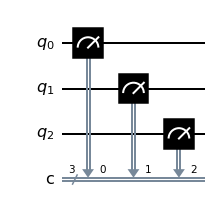

In [22]:
qc = QuantumCircuit(3, 3)

#A:正解
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

In [ ]:
qc = QuantumCircuit(3, 3)

#B
qc.measure([0,0], [1,1], [2,2]) # TypeError: measure() takes 3 positional arguments but 4 were given
qc.draw('mpl')

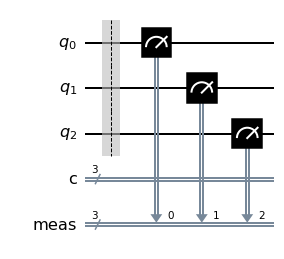

In [ ]:
qc = QuantumCircuit(3, 3)

#C
qc.measure_all() # 新しい古典レジスタができる
qc.draw('mpl')

In [ ]:
qc = QuantumCircuit(3, 3)

#D
qc.measure(0, 1, 2) # TypeError: measure() takes 3 positional arguments but 4 were given
qc.draw('mpl')

## 5.Which code fragment will produce a maximally entangled, or Bell, state ?

In [ ]:
from qiskit import QuantumCircuit

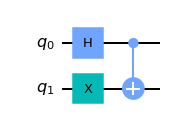

In [ ]:
#A:正解
bell = QuantumCircuit(2)
bell.h(0)
bell.x(1)
bell.cx(0, 1)

bell.draw('mpl')

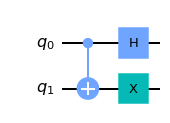

In [23]:
#B
bell = QuantumCircuit(2)
bell.cx(0, 1)
bell.h(0)
bell.x(1)

bell.draw('mpl')

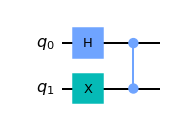

In [24]:
#C
bell = QuantumCircuit(2)
bell.h(0)
bell.x(1)
bell.cz(0, 1)

bell.draw('mpl')

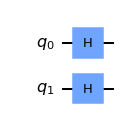

In [25]:
#D
bell = QuantumCircuit(2)
bell.h(0)
bell.h(1)

bell.draw('mpl')

## 6.Given this code, which two inserted code fragments result in the state vector represented by this Bloch sphere?

In [27]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
import math

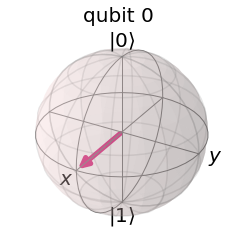

In [28]:
qc = QuantumCircuit(1, 1)

#A：正解
qc.h(0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

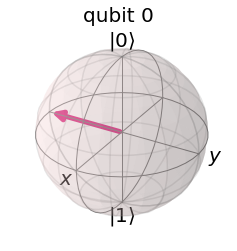

In [29]:
qc = QuantumCircuit(1, 1)

#B
qc.rx(math.pi / 2, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

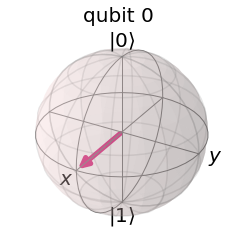

In [30]:
qc = QuantumCircuit(1, 1)

#C：正解
qc.ry(math.pi / 2, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

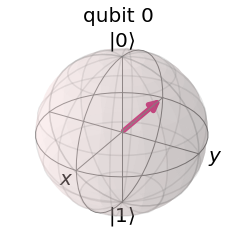

In [31]:
qc = QuantumCircuit(1, 1)

#D
qc.rx(math.pi / 2, 0)
qc.rz(-math.pi / 2, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

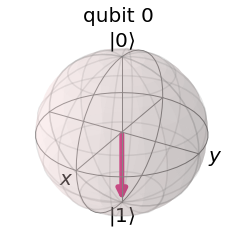

In [32]:
qc = QuantumCircuit(1, 1)

#E
qc.ry(-math.pi, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

## 7.S-gate is a Qiskit phase gate with what value of the phase parameter?

<https://qiskit.org/documentation/stubs/qiskit.circuit.library.SGate.html?highlight=s%20gate#qiskit.circuit.library.SGate>

In [34]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

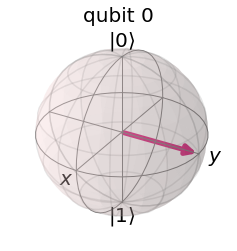

In [ ]:
qc = QuantumCircuit(1, 1)

qc.h(0)
qc.s(0) #pi/2 の回転　→　B

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

## 8.Which two code fragments, when inserted into the code below, will produce the statevector shown in the output?

+ outputは 00 01 10 11 の確率。

In [35]:
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt

In [ ]:
qc = QuantumCircuit(2)

#A:正解
v = [1/sqrt(2), 0, 0, 1/sqrt(2)]
qc.initialize(v,[0,1])

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [ ]:
qc = QuantumCircuit(2)

#B:正解
qc.h(0)
qc.cx(0,1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [43]:
qc = QuantumCircuit(2)

#C
v1, v2 = [1,0], [0,1]
qc.initialize(v1,0)
qc.initialize(v2,1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [37]:
qc = QuantumCircuit(2)

#D
qc.cx(0,1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [41]:
qc = QuantumCircuit(2)

#E
qc.h(0)
qc.h(1)
qc.measure_all()

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

# 実行ごとに結果は異なる

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


## 9.Which code fragment will produce a multi-qubit gate other than a CNOT ?

In [44]:
from qiskit import QuantumCircuit

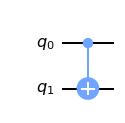

In [ ]:
qc = QuantumCircuit(2)

#A
qc.cx(0,1)

qc.draw('mpl')

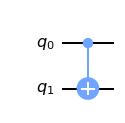

In [ ]:
qc = QuantumCircuit(2)

#B
qc.cnot(0,1)

qc.draw('mpl')

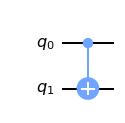

In [ ]:
qc = QuantumCircuit(2)

#C
qc.mct([0],1) # MCXGate https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate

qc.draw('mpl')

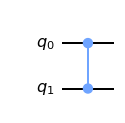

In [ ]:
qc = QuantumCircuit(2)

#D：正解
qc.cz(0,1)

qc.draw('mpl')

## 10.Which code fragment will produce a multi-qubit gate other than a Toffoli?

+ トフォリゲート＝CCNOTゲート

In [45]:
from qiskit import QuantumCircuit

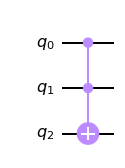

In [ ]:
qc = QuantumCircuit(3)

#A
qc.ccx(0, 1, 2)

qc.draw('mpl')

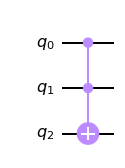

In [ ]:
qc = QuantumCircuit(3)

#B
qc.mct([0,1], 2)

qc.draw('mpl')

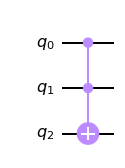

In [ ]:
qc = QuantumCircuit(3)

#C
from qiskit.circuit.library import CXGate
ccx = CXGate().control()  # https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.control.html#qiskit.circuit.library.CXGate.control
qc.append(ccx, [0, 1, 2])

qc.draw('mpl')

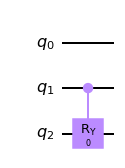

In [ ]:
qc = QuantumCircuit(3)

#D:正解
qc.cry(0, 1, 2)

qc.draw('mpl')

## 11.Which two options would place a barrier across all qubits to the QuantumCircuit below?

In [46]:
from qiskit import QuantumCircuit

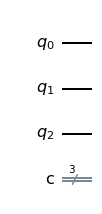

In [ ]:
qc = QuantumCircuit(3, 3)

#A
qc.barrier(qc)

qc.draw('mpl')

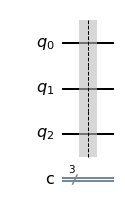

In [ ]:
qc = QuantumCircuit(3, 3)

#B:正解
qc.barrier([0,1,2])

qc.draw('mpl')

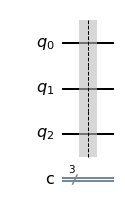

In [ ]:
qc = QuantumCircuit(3, 3)

#C:正解
qc.barrier()

qc.draw('mpl')

In [ ]:
qc = QuantumCircuit(3, 3)

#D
qc.barrier(3) # CircuitError: 'Index out of range.'

qc.draw('mpl')

In [ ]:
qc = QuantumCircuit(3, 3)

#E
qc.barrier_all() # AttributeError: 'QuantumCircuit' object has no attribute 'barrier_all'

qc.draw('mpl')

## 12.What code fragment codes the equivalent circuit if you remove the barrier in the following QuantumCircuit?

+ TGate = Z(pi/4)
+ SGate = Z(pi/2)  
https://qiskit.org/documentation/stubs/qiskit.circuit.library.SGate.html#qiskit.circuit.library.SGate

In [47]:
from qiskit import QuantumCircuit, Aer ,execute

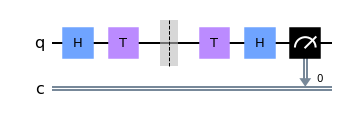

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.t(0)
qc.barrier()
qc.t(0)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.70710678j 0.        +0.j        ]


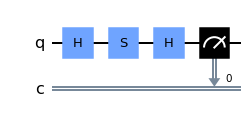

In [ ]:
#A:正解
qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.70710678j 0.        +0.j        ]


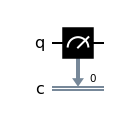

In [ ]:
#B
qc = QuantumCircuit(1,1)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[1.+0.j 0.+0.j]


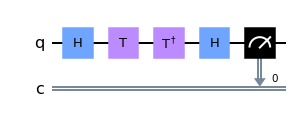

In [ ]:
#C
qc = QuantumCircuit(1,1)
qc.h(0)
qc.t(0)
qc.tdg(0)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[1.+0.j 0.+0.j]


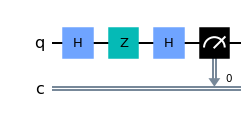

In [ ]:
#D
qc = QuantumCircuit(1,1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


## 13.Given the following code, what is the depth of the circuit?

+ depth の計算では barrier を含まない。

In [48]:
from qiskit import QuantumCircuit

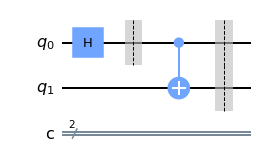

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])

qc.draw('mpl')

In [ ]:
print(qc.depth()) #A

2


## 14.Which code snippet would execute a circuit given these parameters?

1) • Measure the circuit 1024 times,  
2) • use the QASM simulator,  
3) • and use a coupling map that connects three qubits linearly

In [49]:
from qiskit import QuantumCircuit, Aer, execute

In [51]:
qc = QuantumCircuit(3)

#A:正解
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, shots=1024, coupling_map=couple_map)

result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='9958dac1-6c50-41c5-9d6c-cc4b7d371012', job_id='f8989806-88c7-4bc2-adb2-da672b572bd8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-432', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=2168851003, metadata={'parallel_shots': 1, 'method': 'stabilizer', 'parallel_state_update': 2, 'measure_sampling': True, 'fusion': {'enabled': False}}, time_taken=0.00011667100000000001)], date=2021-11-28T10:16:18.444290, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.2'), metadata={'time_taken': 0.0007232600000000001, 'parallel_experiments': 1, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'num_mpi_processes': 1, 'max_memory_mb': 12991, 'mpi_rank': 0

In [ ]:
qc = QuantumCircuit(3)

#B
qasm_sim = Aer.getBackend('ibmq_simulator') # AttributeError: 'AerProvider' object has no attribute 'getBackend'
couple_map = [[0, 1], [0, 2]]
job = execute(qc, loop=1024, coupling_map=couple_map)

result = job.result()
print(result)

In [52]:
qc = QuantumCircuit(3)

#C
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, repeat=1024, coupling_map=couple_map) # ショット数は shots で指定

result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='e18bb93d-e712-4df1-88fc-2a70508943ae', job_id='332b1a9c-7f13-40d3-a06d-84e8c3899911', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-434', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1412239515, metadata={'parallel_shots': 1, 'method': 'stabilizer', 'parallel_state_update': 2, 'measure_sampling': True, 'fusion': {'enabled': False}}, time_taken=0.00010143500000000001)], date=2021-11-28T10:16:21.203968, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.2'), metadata={'time_taken': 0.000314493, 'parallel_experiments': 1, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'num_mpi_processes': 1, 'max_memory_mb': 12991, 'mpi_rank': 0}, time_ta

In [ ]:
qc = QuantumCircuit(3)

#D
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(backend=qasm_sim, qc, shot=1024, coupling_map=couple_map) # SyntaxError: positional argument follows keyword argument

result = job.result()
print(result)

## 15.Which of these would execute a circuit on a set of qubits which are coupled in a custom way?

In [54]:
from qiskit import QuantumCircuit, execute, BasicAer

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)

#A:正解
execute(qc, backend, shots=1024, coupling_map=[[0,1], [1,2]])

No classical registers in circuit "circuit-354", counts will be empty.


In [55]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)

#B
execute(qc, backend, shots=1024, custom_topology=[[0,1],[2,3]]) # SyntaxError: unexpected EOF while parsing

/usr/local/lib/python3.7/dist-packages/qiskit/execute_function.py:399: UserWarning: Option custom_topology is not used by this backend
  job = backend.run(experiments, **run_kwargs)
No classical registers in circuit "circuit-436", counts will be empty.


In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)

#C
execute(qc, backend, shots=1024, device="qasm_simulator", mode="custom")

/usr/local/lib/python3.7/dist-packages/qiskit/execute_function.py:399: UserWarning: Option device is not used by this backend
  job = backend.run(experiments, **run_kwargs)
/usr/local/lib/python3.7/dist-packages/qiskit/execute_function.py:399: UserWarning: Option mode is not used by this backend
  job = backend.run(experiments, **run_kwargs)
No classical registers in circuit "circuit-356", counts will be empty.


In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)

#D
execute(qc, backend, mode="custom")

/usr/local/lib/python3.7/dist-packages/qiskit/execute_function.py:399: UserWarning: Option mode is not used by this backend
  job = backend.run(experiments, **run_kwargs)
No classical registers in circuit "circuit-358", counts will be empty.


## 16.Which three simulators are available in BasicAer?

In [ ]:
#https://qiskit.org/documentation/locale/ja_JP/tutorials/simulators/1_aer_provider.html
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [ ]:
#A:正解
sim = Aer.get_backend('qasm_simulator')

In [ ]:
#B
sim = Aer.get_backend('basic_qasm_simulator') # QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
#C:正解
sim = Aer.get_backend('statevector_simulator')

In [ ]:
#D:正解
sim = Aer.get_backend('unitary_simulator')

In [ ]:
#E
sim = Aer.get_backend('quantum_simulator') # QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
#F
sim = Aer.get_backend('quantum_circuit_simulator') # QiskitBackendNotFoundError: 'No backend matches the criteria'

## 17.Which line of code would assign a statevector simulator object to the variable backend ?

In [ ]:
from qiskit import BasicAer

#A
backend = BasicAer.StatevectorSimulatorPy() # AttributeError: 'BasicAerProvider' object has no attribute 'StatevectorSimulatorPy'

In [ ]:
#B:正解
backend = BasicAer.get_backend('statevector_simulator')

In [ ]:
#C
backend = BasicAer.StatevectorSimulatorPy().name() # AttributeError: 'BasicAerProvider' object has no attribute 'StatevectorSimulatorPy'

In [ ]:
#D
backend = BasicAer.get_back('statevector_simulator') # AttributeError: 'BasicAerProvider' object has no attribute 'get_back'

## 18.Which code fragment would yield an operator that represents a single-qubit X gate?

+ <https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html?highlight=operator>
+ XGate=[[0,1][1,0]]

In [57]:
from qiskit.quantum_info import Operator

In [ ]:
#A
op = Operator.Xop(0) # AttributeError: type object 'Operator' has no attribute 'Xop'

In [58]:
#B
op = Operator([[0,1]])

In [59]:
#C:正解
qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)

In [60]:
#D
op = Operator([[1,0,0,1]]) # IGate

## 19.What would be the fidelity result(s) for these two operators, which differ only by global phase?

```python
op_a = Operator(XGate())
op_b = numpy.exp(1j * 0.5) * Operator(XGate())

A. state_fidelity() of 1.0
B. state_fidelity() and average_gate_fidelity() of 1.0
C. average_gate_fidelity() and process_fidelity() of 1.0
D. state_fidelity(), average_gate_fidelity() and process_fidelity() of 1.0
```

In [ ]:
from qiskit.circuit.library import XGate
from qiskit import quantum_info
import numpy

In [ ]:
op_a = Operator(XGate())
op_b = numpy.exp(1j * 0.5) * Operator(XGate())

+ https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html
+ 2つの状態の類似度。
+ $F(\rho_1, \rho_2) = Tr[\sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}}]^2$

In [ ]:
#A,B,D
quantum_info.state_fidelity(op_a, op_b) # QiskitError: 'Input is not a quantum state'

+ <https://qiskit.org/documentation/stubs/qiskit.quantum_info.process_fidelity.html#qiskit.quantum_info.process_fidelity>
+ 量子チャネル間の類似度（演算子の類似度）
+ $F_{\text{pro}}(\mathcal{E}, U) = \frac{Tr[S_U^\dagger S_{\mathcal{E}}]}{d^2}$

In [ ]:
#C,D
quantum_info.process_fidelity(op_a, op_b)

1.0

+ https://qiskit.org/documentation/stubs/qiskit.quantum_info.average_gate_fidelity.html#qiskit.quantum_info.average_gate_fidelity
+ process_fidelity が１の場合、process_fidelity も１になる。
+ \begin{split}F_{\text{ave}}(\mathcal{E}, U)
    &= \int d\psi \langle\psi|U^\dagger
        \mathcal{E}(|\psi\rangle\!\langle\psi|)U|\psi\rangle \\
    &= \frac{d F_{\text{pro}}(\mathcal{E}, U) + 1}{d + 1}\end{split}

In [ ]:
#B,C,D　→正解：C
quantum_info.average_gate_fidelity(op_a, op_b)

1.0

## 20.Given this code fragment, which output fits most closely with the measurement probability distribution?


A. {'00': 1000}  
B. {'01': 1000}  
C. {'10': 1000}  
D. {'11': 1000}

In [ ]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts) # B

{'01': 1000}
